Recently [Simon Garier]() created [several visualisations]() from a [football dataset](https://github.com/jalapic/engsoccerdata) compiled by [James Curley]() showing statistics on match performances in the English Premier League.

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.style.use('ramiro')

df = pd.read_csv('csv/bundesliga.csv', parse_dates=['date'], encoding='latin-1')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: James Curley - github.com/jalapic/engsoccerdata'
infosize = 13

In [4]:
print(df.columns)
df.describe()

Index(['date', 'Season', 'home', 'visitor', 'FT', 'hgoal', 'vgoal', 'tier'], dtype='object')


,Season,hgoal,vgoal,tier
count,15508.000000,15508.000000,15508.000000,15508
mean,1988.215115,1.872517,1.202863,1
std,14.591496,1.459254,1.162654,0
min,1963.000000,0.000000,0.000000,1
25%,1976.000000,1.000000,0.000000,1
50%,1988.000000,2.000000,1.000000,1
75%,2001.000000,3.000000,2.000000,1
max,2013.000000,12.000000,9.000000,1


In [5]:
df.sort('date').tail()

,date,Season,home,visitor,FT,hgoal,vgoal,tier
14584,2014-05-10,2013,Bayer Leverkusen,Werder Bremen,2-1,2,1,1
14583,2014-05-10,2013,Bayern München,VfB Stuttgart,1-0,1,0,1
14582,2014-05-10,2013,VfL Wolfsburg,Bor. Mönchengladbach,3-1,3,1,1
14585,2014-05-10,2013,FC Schalke 04,1. FC Nürnberg,4-1,4,1,1
14589,2014-05-10,2013,FC Augsburg,Eintracht Frankfurt,2-1,2,1,1


In [6]:
def result(row):
    if row.hgoal > row.vgoal:
        return 'Home win'
    elif row.hgoal < row.vgoal:
        return 'Home loss'
    return 'Tie'

df['resulttype'] = df.apply(result, axis=1)

In [7]:
resulttypes_by_season = df.groupby(['Season', 'resulttype']).agg(['count'])['date']

In [8]:
#resulttypes_by_season.plot(kind='bar', stacked=True, figsize=(14, 6))
df_rs = resulttypes_by_season.unstack()
df_rs.head()

count             
resulttype Home loss Home win Tie
Season                           
1963              53      126  61
1964              56      122  62
1965              70      168  68
1966              64      158  84
1967              66      167  73

In [9]:
df_rs = df_rs.apply(lambda x: 100 * x / float(x.sum()), axis=1)
df_rs.head()

count                      
resulttype  Home loss   Home win        Tie
Season                                     
1963        22.083333  52.500000  25.416667
1964        23.333333  50.833333  25.833333
1965        22.875817  54.901961  22.222222
1966        20.915033  51.633987  27.450980
1967        21.568627  54.575163  23.856209

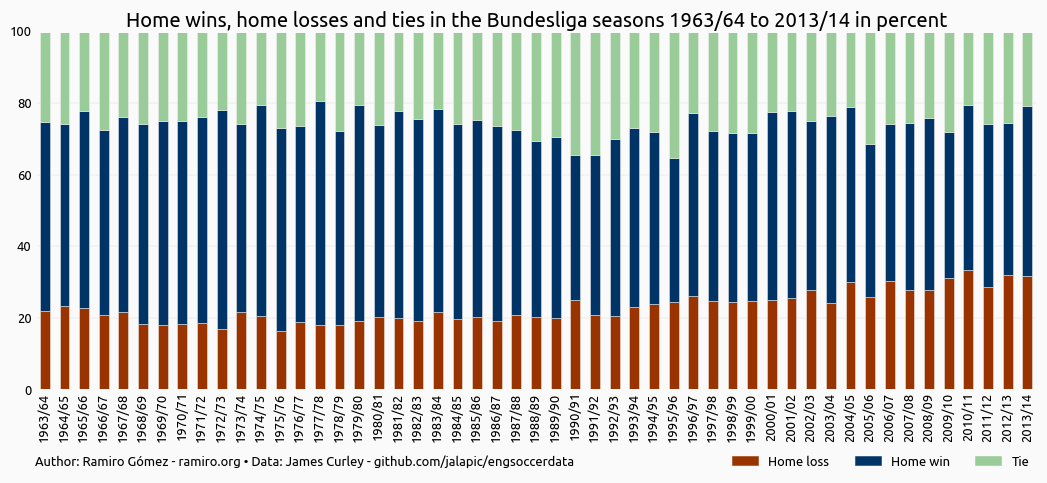

In [115]:
def season_display(year):
    s = str(year)
    return '{0}/{1:02d}'.format(year, int(str(year + 1)[-2:]))

colors = ['#993300', '#003366', '#99cc99']

s1 = df_rs['count']['Home win']
s2 = df_rs['count']['Home loss']
s3 = df_rs['count']['Tie']

xmax = df_rs.index.max()
xmin = df_rs.index.min()

title = 'Home wins, home losses and ties in the Bundesliga seasons {} to {} in percent'.format(
    season_display(xmin), season_display(xmax))

ax = df_rs.plot(kind='bar', stacked=True, figsize=(16, 6), color=colors, title=title, fontsize=13)
ax.set_ylim([0, 100])
ax.set_xlabel('', visible=False)
ax.xaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda val, p: season_display(df_rs.index[val])))

p1 = mpatches.Patch(color=colors[0], label='Home loss')
p2 = mpatches.Patch(color=colors[1], label='Home win')
p3 = mpatches.Patch(color=colors[2], label='Tie')

ax.legend(loc=(.69, -.23), handles=[p1, p2, p3], ncol=3, fontsize=13)
ax.annotate(chartinfo, xy=(0, -1.21), xycoords='axes fraction', fontsize=infosize)
plt.savefig('img/wins-losses-ties-percent-bundesliga-{}-{}.png'.format(xmin, xmax), bbox_inches='tight')

Home goals vs away goals scatterplot aggreagated for each match day.

In [11]:
goals = df.groupby(['vgoal', 'hgoal']).agg('count')['date']
goals = goals.unstack().fillna(0)

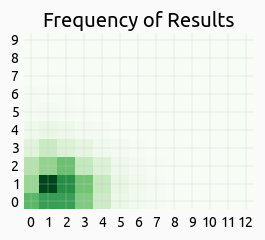

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(goals, cmap=plt.cm.Greens, interpolation='none')
ax.set_title('Frequency of Results')

plt.yticks(range(len(goals)))
plt.xticks(range(len(goals.columns)))

plt.gca().invert_yaxis()
plt.show()

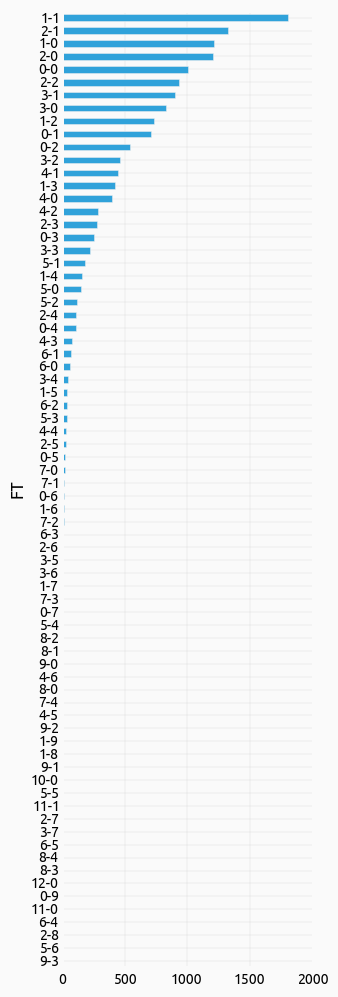

In [156]:
s = df.groupby('FT').agg('count')['date']
#plot(kind='bar')
s.order().plot(kind='barh', figsize=(4, 16))

In [49]:
grouped = df.groupby('FT').agg('count')

In [70]:
df_results = pd.DataFrame(s)
df_results['hgoal'] = df_results.index.map(lambda x: int(x.split('-')[0]))
df_results['vgoal'] = df_results.index.map(lambda x: int(x.split('-')[1]))

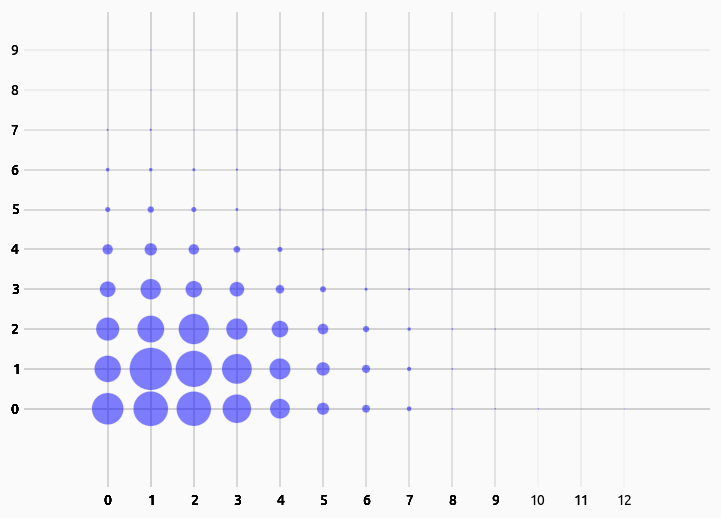

In [154]:
plt.scatter(df_results.hgoal, df_results.vgoal, s=df_results.date, alpha=0.5)
fig = plt.gcf()

fig.set_figwidth(11)
fig.set_figheight(8)

fig.axes[0].set_xticks(df_results.hgoal)
fig.axes[0].set_yticks(df_results.vgoal)

#ax.axes.set_xticks(df_results['hgoal'].values)
#ax.axes.set_yticks(df_results['vgoal'].values)
plt.show()